# Redivis API Demonstration Notebook
## Contents
* <a href = '#summary'>Summary</a>
* <a href = '#prerequisites'>Prerequisites</a>
    - <a href = '#libraries'>Libraries</a>
    - <a href = '#api'>API Token</a>
* <a href = '#import'>Importing a Redivis Dataset</a>
    - <a href = '#exBasic'>Basic dataframe exploration</a>
    - <a href = '#plotting'>Plotting</a>
* <a href = '#upload'>Uploading data to Redivis</a>
    - <a href = '#createDataset'>Create a new Redivis dataset</a>
    - <a href = '#createTable'>Create a table and upload data</a>
    - <a href = '#newVersion'>Create a new version of an existing dataset</a>
    - <a href = '#metadata'>Update metadata for table variables</a>

## <a id = "summary"></a>Summary
Redivis provides a RESTful API that allows users to programmatically interact with the Redivis platform. This API enables users to access and manipulate datasets, files, projects, and other resources available on Redivis. This notebook offers a demonstration of these workflows.

## <a id = "prerequisites"></a>Prerequisites
### <a id = "libraries"></a>Libraries

If you need to install the Redivis client library for Python, uncomment the pip install line prior to running the library import cell (below). Importing this library allows us to interact with the Redivis platform programmatically from within this notebook.

Python's operating system interface library ("os" is needed for Redivis authentication within Jupyter. NOTE: Here, we <a href="#api">set the corresponding environment variable within this notebook</a>. This approach is less secure than other approaches (e.g., via direct entry using command line), but more straightforward. If you utilize this approach, make sure to remove your credentials prior to sharing your notebook.

In [1]:
# !pip install redivis
# !pip install --upgrade redivis

import redivis # Redivis client library for Python
import pandas as pd # import pandas library (as alias "pd") for dataframe handling  
import os # import operating system interface library for setting API token as environment variable
import matplotlib.pyplot as plt # import the Matplotlib's pyplot (plotting) module and alias it as plt
import numpy as np # import NumPy library and alias it as np

### <a id = "api"></a>API Token

Authentication with your Redivis account: 
* Generate an API token within the Redivis platform (see <a href = "https://apidocs.redivis.com/rest-api/authorization" target = "_blank">Redivis Authorization</a>).
* Copy your API token from Redivis and paste within the quotation marks in the cell below.
* Run the cell
  
NOTE: Setting the environment variable within Jupyter is less secure than other approaches (e.g., via direct entry using command line). If you utilize this approach, make sure to remove your credentials prior to sharing your notebook. Alternatively, follow these instructions to implement a higher security approach:
* <a href = "https://learn.microsoft.com/en-us/windows-server/administration/windows-commands/set_1" target = "_blank">Windows</a>
* <a href = "https://phoenixnap.com/kb/set-environment-variable-mac" target = "_blank">MacOS</a>
* <a href = "https://www.freecodecamp.org/news/how-to-set-an-environment-variable-in-linux/" target = "_blank">Linux</a>

In [2]:
os.environ["REDIVIS_API_TOKEN"] = "xxxxxxxxx/xxxxxxxxxxxxxxxxxxxxxx"

In [3]:
# Set names for Redivis user ID and organization ID
redivisUserID = "yourUserID"
redivisOrgName = "yourOrgName" # e.g., CMU Libraries is "CMULibraries"

## <a id = "import"></a>Importing a Redivis Dataset
Within the Redivis environment, ORGANIZATIONS contain DATASETS and datasets contain TABLES. To interact with Redivis to access a specific table, we set the following:
* Line 1 defines the Redivis organization for the table you wish to import (change the quoted text to match the organization you want to connect to; e.g., here, we connect to "CMULibraries;" to connect to Redivis demo datasets, change to "demo").
* Line 2 defines the dataset you wish to import from. This dataset must be located within the organization you specified above (here, we are connecting to the "Low-income Energy Affordability Data" dataset within the CMULibraries organization). Change the text to match the name of the dataset you wish to import from.
* Line 3 defines the table you wish to import. Here, we are importing the "Lead Tract Level" table within the "Low-income Energy Affordability Data" dataset that is housed within the CMULibraries organization. Change the text to match the name of the table you wish to import.
* Lastly, in line 4, we convert our table object (created in line 3) to a Pandas dataframe named, "df".   

In [4]:
organization = redivis.organization(redivisOrgName) 
dataset = organization.dataset("Low-income Energy Affordability Data")
table = dataset.table("LEAD Tract Level")
df = table.to_pandas_dataframe()

  0%|          | 0/84269 [00:00<?, ?it/s]

### <a id = "exBasic"></a>Basic Dataframe Exploration

The "Low-income Energy Affordability Data" table we imported consists of census tract level data of the Low-Income Energy Affordability Data (LEAD) Tool created by Office of Energy Efficiency and Renewable Energy, U.S. Department of Energy. 

We can explore the dataframe by uncommenting and running any of the following:
* print(df.head()) prints the first five rows of the dataframe
* print(df.columns) prints the columns names within the dataframe
* print(df.info()) prints a summary of the dataframe, including number of non-null values in each column, data types, and memory usage
* print(df.describe()) provides descriptive statistics for numerical columns within the dataframe

In [5]:
# print(df.head()) 
print(df.columns) 
# print(df.info())
# print(df.describe())

Index(['State', 'County', 'Geography_ID', 'Name', 'Energy_Burden',
       'Avg_Annual_Energy_Cost', 'Total_Households', 'Household_Income',
       'Black_African_American', 'American_Indian_Native_Alaskan', 'Asian',
       'Native_Hawaiian_Other_Pacific_Islander', 'White_Hispanic_or_Latino',
       'White_Non_Hispanic_or_Latino', 'Two_or_More_Races', 'Other_Races',
       'Less_Than_High_School', 'High_School', 'Associates_or_Some_College',
       'Bachelors_or_Higher'],
      dtype='object')


### <a id = "plotting"></a>Plotting

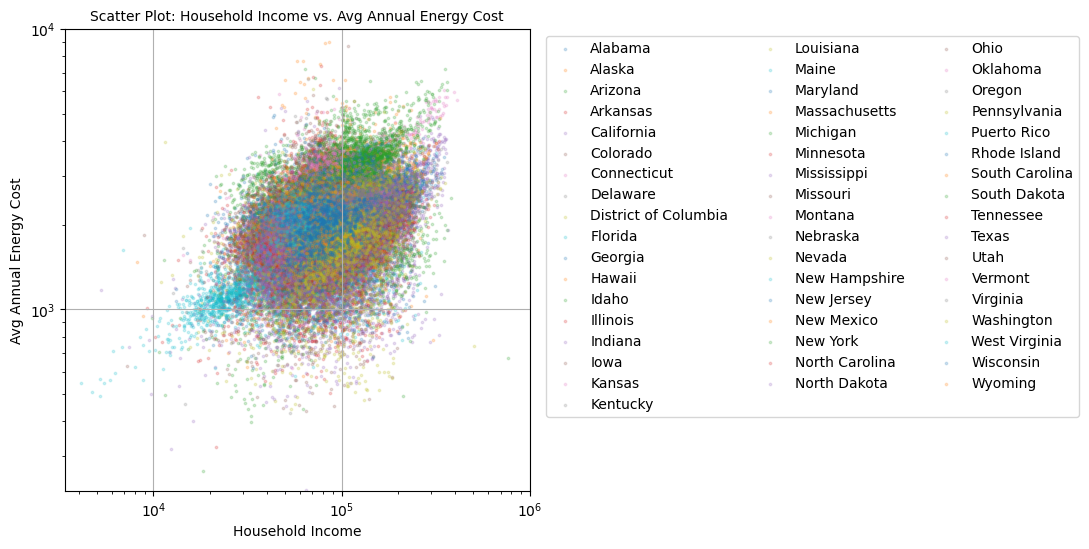

In [6]:
# Scatter plot
plt.figure(figsize=(6, 6))  # Set the figure size

# Customize marker size, shape, and opacity
marker_size = 3
marker_shape = 'o'  # Circle marker
point_opacity = 0.2  # Adjust opacity (0.0 to 1.0)

# Scatter plot where markers are colored by state column value
for state, group in df.groupby('State'):
    plt.scatter(group['Household_Income'], group['Avg_Annual_Energy_Cost'],
                label = state, s = marker_size, marker = marker_shape, alpha = point_opacity)

# Add labels and title
plt.xlabel('Household Income')
plt.ylabel('Avg Annual Energy Cost')
plt.title('Scatter Plot: Household Income vs. Avg Annual Energy Cost', fontsize = 10)

plt.xscale('log')  # Set x-axis scale to logarithmic
plt.yscale('log')  # Set y-axis scale to logarithmic

# Add legend to the right side outside the plot area, use three columns for state names
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1), ncol=3)

# Set custom axis limits
plt.xlim(15**3, 10**6)  # Adjust x-axis limits
plt.ylim(15**2, 10**4)  # Adjust y-axis limits

# Show the plot
plt.grid(True)
plt.show()

## <a id = "upload"></a>Uploading Data to Redivis

Create variables for dataset name, table name, and filepath so they don't have to be changed within the code

In [6]:
datasetName = "nameYouWant" # replace with name of dataset
tableName = "tableNameYouWant" # replace with name of table

path = "C:/Users/path/path" # change to your filepath
filename = "data.csv" # change to name of file
filepath = os.path.join(path, filename) # create a full filepath

### <a id = "createDataset"></a>Creating a Redivis Dataset

In [7]:
# Create under your user account OR under your organization (uncomment and run one of the following two lines)
dataset = redivis.user(redivisUserID).dataset("datasetName") # as user
# dataset = redivis.organization(redivisOrgName).dataset(datasetName) # as organization

# create dataset & set public access level; 
# access options: 'none', 'overview', 'metadata', 'sample', 'data'
dataset.create(
    public_access_level="overview", 
    description = "testDescription") # Replace with dataset description (will show in abstract field)

<Dataset name:'test9999' qualified_reference:'cmulibraries.test9999:9a7e:next' uri:'/datasets/cmulibraries.test9999:9a7e:next'>

### <a id = "createTable"></a>Creating a Table and Upload to Redivis

In [8]:
# Create a table within the dataset
table = (
    dataset
    .table(tableName) 
    .create(description="this is a test description") # Replace with table description 
)

In [9]:
# upload file (specied in filepath above) to the table
upload = table.upload(filepath) 

with open(filepath, "rb") as file:
    upload.create(
        file, 
        has_header_row = True,  # for csv and xls files; defaults as true
        wait_for_finish=True,   # Wait for the upload to finish processing; defaults as true
        raise_on_fail=True      # Raise an error on failure; defaults as true
    )

In [10]:
# Release the dataset
dataset.release()

<Dataset name:'test9999' qualified_reference:'cmulibraries.test9999:9a7e:v1_0' uri:'/datasets/cmulibraries.test9999:9a7e:v1_0'>

### <a id = "newVersion"></a>Create a new version of an existing dataset

See <a href = "https://apidocs.redivis.com/resource-definitions/upload" target = "_blank">documentation</a> for full list of variables/definitions

Note: documentation says dataset.create_next_version() can take a "ignore_if_exists=True" argument, but that results in a type error; the "next version" updates after a few minutes to the next version number, at which point the flag does not appear needed anyway.

In [11]:
dataset = redivis.organization(redivisOrgName).dataset(datasetName) # connect to dataset

# create new version
dataset = dataset.create_next_version() 
table = dataset.table(tableName)

# upload new data to the existing table for the next version
# to append a table with new data, remove the "upload_merge_strategy"
# to replace a table with a new table, use "upload_merge_strategy" with "replace"
table.update(upload_merge_strategy="replace")

upload = table.upload(filepath)
with open(filepath, "rb") as file:
    upload.create(
        file,
        type="delimited",            # Options: stream, delimited, csv, ndjson, avro, parquet, orc, xls, xlsx, dta, sas7bdat, sav
        skip_bad_records=False,      
        has_header_row=True,         # Only relevant for csv, xls(x)
    )

# release next version
dataset.release()

<Dataset name:'test9999' qualified_reference:'cmulibraries.test9999:9a7e:v1_1' uri:'/datasets/cmulibraries.test9999:9a7e:v1_1'>

### <a id = "newVersion"></a>Update metadata for table variables (column names)

In [23]:
# define table
table = redivis.organization(redivisOrgName).dataset(datasetName).table(tableName)

var1 = "variableToEdit" # replace with name of variable you want to update
var1label = "short description of var1" # replace with short description
var1desc = "description of var1" # replace with description

# for var1, create dictionary with possible values and corresponding descriptions
# replace "valueToEdit" and "newLabel"
valueDict = [{"value":"valueToEdit1", "label":"newLabel1"}, 
             {"value":"valueToEdit2", "label":"newLabel2"}
            ]

In [24]:
variable = table.variable(var1) # variable you want to update

# updates var label, description, and value labels
variable.update(label=var1label,
                description=var1desc,
                value_labels = valueDict 
                )